 ## Customer Segmentation.


**Task 1: Cluster similar customers together.**

**Task 2: Specific characteristics of target group.**   

----------------------------------------------------------------------------------------------------------------------------

**Structure of notebook:**

**Task 1: Cluster similar customers together.**
> 1. Importing Libraries.
> 1. EDA.
> 1. Data Visualization.
> 1. Clustering using K-Means.
> 1. Selection of Clusters
> 5.1 Elbow Method.
> 5.2 Silhouette  score  method.
> 1. 2D plot of clusters.
> 1. PCA k_mean clustering.
> 1. 3D plot of clusters.

**Task 2: Specific characteristics of target group.**
  

----------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importing required libraries for kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

----------------------------------------------------------------------------------------------------------------------------

### Task 1: Cluster similar customers together.

### EDA

In [2]:
df=pd.read_csv("D:/Mall_Customers.csv")
df.head() #unsupervised learning problem so target Label is unknown

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Description:
 1. CustomerID ----> Unique customer identification number.
 1. Gender----> Female and Male.
 1. Age---> Age of the clients.
 1. Annual Income (k)---> Annual income of clients.
 1. Spending Score (1-100)---> It is the spending score assigned by the shopping center according to the customer's purchasing behavior.

In [3]:
df.shape #small dataset - 200 rows and 5 columns in the dataset

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum() #Missing values check

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes # Gender is categorical variable

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------------------------------------------------------------------------------------------------------------

### Data Visualization

Female    112
Male       88
Name: Gender, dtype: int64

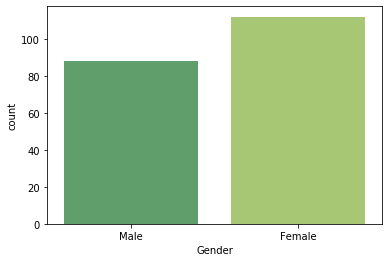

In [10]:
sns.countplot(df['Gender'],palette='summer')
df["Gender"].value_counts()

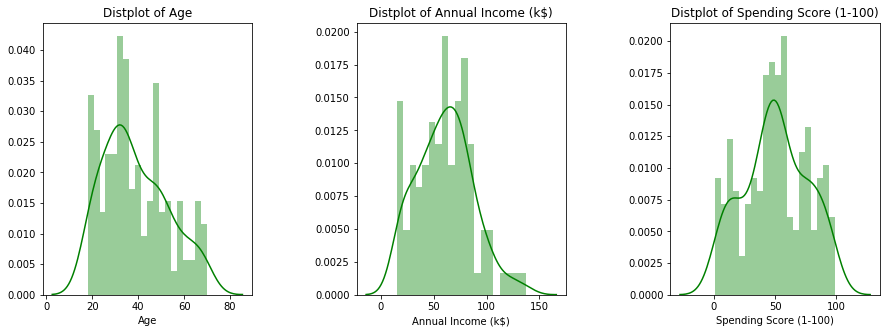

In [11]:
plt.figure(1,figsize=(15,5)) # Distribution Plot
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20,color='g')
    plt.title('Distplot of {}'.format(x))
plt.show()

In [12]:
df_=pd.get_dummies(df, drop_first=True) # OHE on categorical variable.
df_.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [13]:
df_cluster = df_.rename(columns={'Gender_Male':'Gender'}) # Rename Gender column 

In [14]:
df_cluster= df_cluster.drop('CustomerID', axis=1) # drop customer id
df_cluster.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


----------------------------------------------------------------------------------------------------------------------------

### Outlier detection 

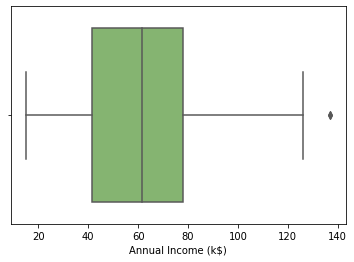

In [15]:
sns.boxplot(df_cluster['Annual Income (k$)'], palette='summer') 

In [16]:
IQR=df_cluster['Annual Income (k$)'].quantile(0.75)-df_cluster['Annual Income (k$)'].quantile(0.25) # Outlier Removal
lower_bound=df_cluster['Annual Income (k$)'].quantile(0.25)-(IQR*1.5)
upper_bound=df_cluster['Annual Income (k$)'].quantile(0.75)+(IQR*1.5)
print(lower_bound), print(upper_bound)

-13.25
132.75


(None, None)

In [17]:
df_cluster['Annual Income (k$)'].quantile(.50)

61.5

### Handling Outliers

In [18]:
df_cluster['Annual Income (k$)']=np.where(df_cluster['Annual Income (k$)']>132,132,df_cluster['Annual Income (k$)'])

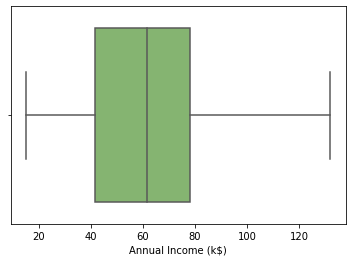

In [19]:
sns.boxplot(df_cluster['Annual Income (k$)'], palette='summer')


----------------------------------------------------------------------------------------------------------------------------

### K-MEANS CLUSTERING
> 
> K-Means Clustering is an Unsupervised Learning algorithm, used to group the unlabeled dataset into different clusters.
> It is sensitive to outliers. 
>
#### ALGORITHM:
>
>    1. Choose the number of clusters k.
>    2. Select k random points from the data as centroids.
>    3. Assign each data points to the closest cluster centroid.
>    4. Recompute the centroids of newly formed clusters.
>    5. Repeat steps 3 and 4.
>
#### Parameters in k-mean:
>
>    1. k-means++ : selects initial cluster centers for k-mean clustering.
>    2. n_clusters : The number of clusters to form as well as the number of centroids.
>    3. n_init: Number of time the k-means algorithm will be run with different centroid seeds.
>    4. random_state: random number generation for centroid initialization.
>    5. algorithm{“auto”, “full”, “elkan”}

In [20]:
X=df_cluster.iloc[:,1:3] #Standardize the data to have a mean of ~0 and a variance of 1
sc = StandardScaler()
X = sc.fit_transform(X)
X= pd.DataFrame(X, columns = ['Annual Income (k$)', 'Spending Score (1-100)']) # clusturing using Annual Income & Spending Score.
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,-1.746526,-0.434801
1,-1.746526,1.195704
2,-1.708150,-1.715913
3,-1.708150,1.040418
4,-1.669773,-0.395980


----------------------------------------------------------------------------------------------------------------------------

### Selection of Clusters

#### 1. Finding optimal number of cluster using Elbow method.

#### Steps involved in Elbow Method:
>
> 1. K- means clustering is performed for different values of k (from 1 to 11).
>
> 2. WCSS (Within Clusters Sum of Squares) is calculated for each cluster. WCSS is the sum of the square of the distances between each data point and its centroid within a cluster.
>
> 3. A curve is plotted between WCSS values and the number of clusters k.
>
> 4. The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.
>


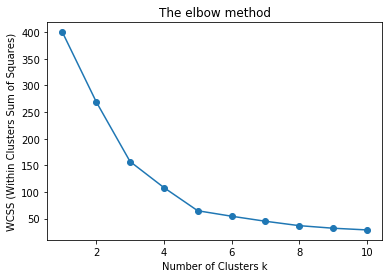

In [21]:
#Elbow method 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state = 75) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of Clusters k')
plt.ylabel('WCSS (Within Clusters Sum of Squares)')
plt.show()

    (k = 5 has sharp point of bend)

----------------------------------------------------------------------------------------------------------------------------

#### 2. SILHOUETTE SCORE METHOD TO FIND 'K' NUMBER OF CLUSTERS

>The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. 
>
>Silhouette Coefficient is calculated using mean intra-cluster distance (a) and mean nearest-cluster distance (b) for each sample. 
>           
>           The Silhouette Coefficient for a sample is 
>                
>                (b - a) / max(a, b).
>                
>           b is the distance between a sample and the nearest cluster that the sample is not a part of.
>
The silhouette score ranges from −1 to +1.

>    1.  +1 indicate that the sample is far away from the neighboring clusters.
>
>    2.  0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. 
>
>    3.  -1 indicate that those samples might have been assigned to the wrong cluster.

Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1

In [22]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.28588788294097156
For n_clusters = 3 The average silhouette_score is : 0.46720880757532385
For n_clusters = 4 The average silhouette_score is : 0.4946274789919488
For n_clusters = 5 The average silhouette_score is : 0.5556536213875637
For n_clusters = 6 The average silhouette_score is : 0.5402700066149605
For n_clusters = 7 The average silhouette_score is : 0.5262060515810082
For n_clusters = 8 The average silhouette_score is : 0.4544749994727302
For n_clusters = 9 The average silhouette_score is : 0.459715977359568


    (n_clusters = 5 has maximum silhouette score hence I choose the value of k = 5)

In [23]:
kmeans=KMeans(n_clusters=5,init='k-means++', random_state = 10) # The optimal value of k is 5.
y_pred= kmeans.fit_predict(X)
print(y_pred)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


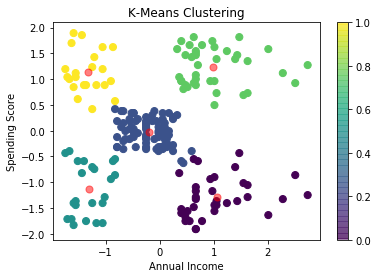

In [24]:
# 2D Plot of Clusters 
centroids = kmeans.cluster_centers_ # Coordinates of cluster centers
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],
                     c=y_pred,s=50)

scatter=ax.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 50 , c = 'red' , alpha = 0.5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
plt.colorbar(scatter)

In [25]:
df_cluster['Cluster']=y_pred
df_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster
0,19,15,39,1,2
1,21,15,81,1,4
2,20,16,6,0,2
3,23,16,77,0,4
4,31,17,40,0,2


In [26]:
df_cluster['Cluster'].value_counts() # Number of customers in each cluster.

1    81
3    39
0    35
2    23
4    22
Name: Cluster, dtype: int64

----------------------------------------------------------------------------------------------------------------------------

### PCA with k_mean clustering

In [27]:
# Standardize the data to have a mean of ~0 and a variance of 1
X=df_cluster.iloc[:,0:4] 
sc = StandardScaler()
X = sc.fit_transform(X)
X=pd.DataFrame(X,columns=['Age','Annual Income (k$)','Spending Score (1-100)','Gender'])
X.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.746526,-0.434801,1.128152
1,-1.281035,-1.746526,1.195704,1.128152
2,-1.352802,-1.708150,-1.715913,-0.886405
3,-1.137502,-1.708150,1.040418,-0.886405
4,-0.563369,-1.669773,-0.395980,-0.886405


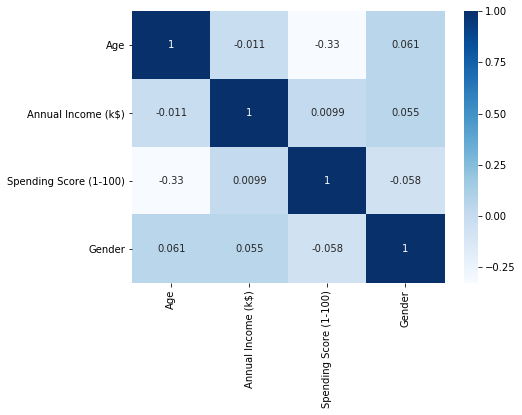

In [28]:
plt.figure(figsize=(7,5))
g=sns.heatmap(X.corr(),annot=True,cmap='Blues')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [29]:
pca=PCA()
pca.fit(X)

PCA()

In [30]:
pca.components_[0]

array([ 0.68787429, -0.00536776, -0.68690437,  0.2344409 ])

In [31]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var

array([ 33.7,  59.9,  83.2, 100. ])

In [32]:
# Create a PCA instance: pca
pca = PCA(n_components=3) # we have 4 features
principalComponents = pca.fit_transform(X)
print("Explained_variance_ratio:",pca.explained_variance_ratio_)  #calculated variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100) #cumsum of variance explained with [n] features
print(var)

Explained_variance_ratio: [0.33689977 0.26182216 0.23308928]
[33.7 59.9 83.2]


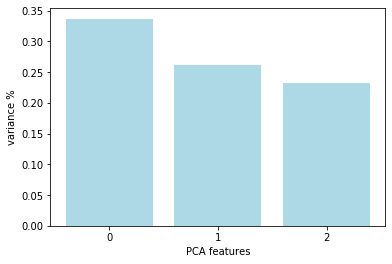

In [33]:
feature=range(pca.n_components)
plt.bar(feature,pca.explained_variance_ratio_,color="lightblue")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(feature)
plt.show()

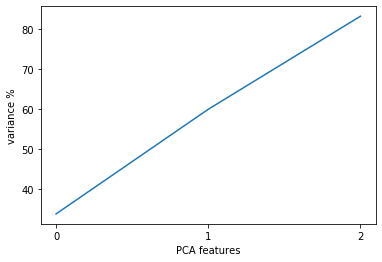

In [34]:
plt.xticks(feature)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.plot(var)

In [35]:
PCA_components=pd.DataFrame(principalComponents, columns=['pca1', 'pca2','pca3'])
PCA_components.head()

,pca1,pca2,pca3
0,-0.407397,-0.534271,-2.078226
1,-1.428666,-0.378904,-2.281049
2,0.049470,-1.904078,-0.370717
3,-1.695767,-1.638627,-0.716968
4,-0.314373,-1.818005,-0.426949


In [36]:
kmeans=KMeans(n_clusters=5,init='k-means++', random_state = 10) # The optimal value of k is 5.
y_pred_= kmeans.fit_predict(PCA_components)
print(y_pred_)

[2 2 4 4 4 4 1 4 3 4 3 4 1 4 3 2 4 2 3 4 3 2 1 2 1 2 1 2 1 4 3 4 3 2 1 4 1
 4 1 4 1 2 3 4 1 4 1 4 4 4 1 2 4 3 1 3 1 3 4 3 3 2 1 1 3 2 1 1 2 4 3 1 1 1
 3 2 1 3 4 1 3 2 3 1 4 3 1 4 4 1 1 2 3 1 1 2 1 4 3 2 4 1 3 2 3 4 1 3 3 3 3
 4 1 2 4 4 1 1 1 1 2 1 0 2 0 0 3 2 3 2 3 2 0 0 3 0 1 2 3 0 1 2 0 0 3 2 3 0
 1 2 3 2 1 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 0 2 3 2 3 2 1 0 3 2 3 2 0 0 3 0 0
 2 1 2 0 0 0 0 3 0 0 0 0 0 0 0]


In [37]:
PCA_components['Cluster']=y_pred_
PCA_components.head(5)

,pca1,pca2,pca3,Cluster
0,-0.407397,-0.534271,-2.078226,2
1,-1.428666,-0.378904,-2.281049,2
2,0.049470,-1.904078,-0.370717,4
3,-1.695767,-1.638627,-0.716968,4
4,-0.314373,-1.818005,-0.426949,4


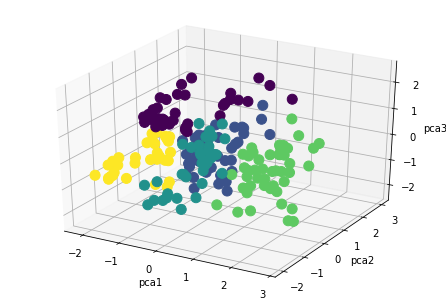

In [38]:
# 3D plotting
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PCA_components['pca1'], PCA_components['pca2'], PCA_components['pca3'], alpha=1, s=100, c=PCA_components['Cluster'])
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

----------------------------------------------------------------------------------------------------------------------------

### Task 2: Specific characteristics of target group

In [39]:
df['Cluster'] = y_pred
df= df.drop('CustomerID', axis=1)
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [40]:
group_=df.groupby(['Cluster']).mean()
group_

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


>    Cluster 0 has - Mid age customers - high annual income and low spending score.
>
>    Cluster 1 has - Mid age customers - mid annual income and mid spending score.
>
>    Cluster 2 has - Mid age customers - low annual income and low spending score.
>
>    Cluster 3 has - Mid age customers - high annual income and high spending score.
>
>    cluster 4 has - Young age customers - low annual income and high spending score.

 #### The main target - 
> 1. Firstly, people whose both annual income and spending score are high. 
>
> 1. Secondly, group of people who don't earn much, but they are eager to spend a lot of money (maybe they are easily influenced by commercials and special offers?).

>    So Main Target Clusters are-
>                       cluster 3 & 
>                       cluster 4

----------------------------------------------------------------------------------------------------------------------------

##### Cluster 3

In [51]:
group_3= df[df['Cluster']==3]
group_3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,Male,39,69,91,3
125,Female,31,70,77,3
127,Male,40,71,95,3
129,Male,38,71,75,3
131,Male,39,71,75,3


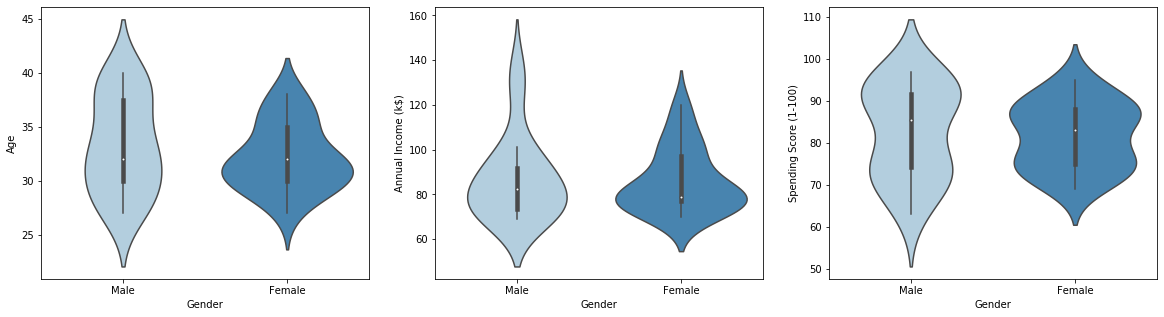

In [42]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_3,ax=axes[0],palette='Blues')
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_3,ax=axes[1],palette='Blues')
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_3,ax=axes[2],palette='Blues')
plt.show()

In [43]:
result_3=group_3.groupby('Gender').agg({'Age':['mean','max','min']})
result_3

Age        
             mean max min
Gender                   
Female  32.190476  38  27
Male    33.277778  40  27

>    Age--->
>
>    Both Male & Female---> Mid age customers ----> Range (27 to 40)
>
>    Mean Age of both gender are same.

In [44]:
result_3=group_3.groupby('Gender').agg({'Spending Score (1-100)':['mean','max','min','median','count']})
result_3

Spending Score (1-100)                     
                         mean max min median count
Gender                                            
Female              81.666667  95  69   83.0    21
Male                82.666667  97  63   85.5    18

>    Spending Score (1-100)--> 
>
>    Both male & Female ---> High Spending Score --> Range (63 to 97).
>
>    Mean & median Spending Score (1-100) is more for males

In [45]:
result_3=group_3.groupby('Gender').agg({'Annual Income (k$)':['mean','max','min','median','count']})
result_3

Annual Income (k$)                      
                     mean  max min median count
Gender                                         
Female          86.047619  120  70   79.0    21
Male            87.111111  137  69   82.5    18

>    Annual Income----> 
>
>    Both male & Female ---> High Annual Income ----> Range (69  to 137).
>
>    Males earn more than females

----------------------------------------------------------------------------------------------------------------------------

##### Cluster 4

In [46]:
group_4= df[df['Cluster']==4]
group_4.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,Male,21,15,81,4
3,Female,23,16,77,4
5,Female,22,17,76,4
7,Female,23,18,94,4
9,Female,30,19,72,4


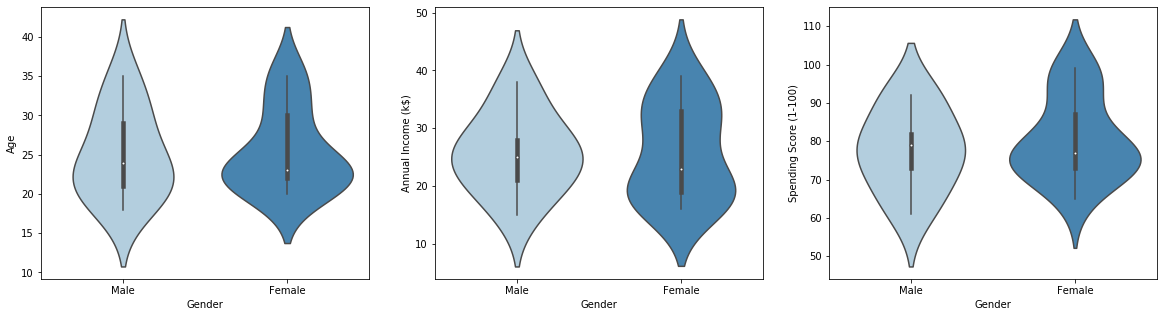

In [47]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_4,ax=axes[0],palette='Blues')
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_4,ax=axes[1],palette='Blues')
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_4,ax=axes[2],palette='Blues')
plt.show()

In [48]:
result_4=group_4.groupby('Gender').agg({'Age':['mean','max','min']})
result_4

Age        
             mean max min
Gender                   
Female  25.461538  35  20
Male    25.000000  35  18

>    Age-----> 
>
>    Mean Age of this cluster are same for both genders.
>
>    Both Male & Female--> Young age customers----> Range (18 to 35).

In [49]:
result_4=group_4.groupby('Gender').agg({'Spending Score (1-100)':['mean','max','min','median','count']})
result_4

Spending Score (1-100)                     
                         mean max min median count
Gender                                            
Female              80.538462  99  65     77    13
Male                77.666667  92  61     79     9

>    Spending Score (1-100)--> High Spending Score---> Range (61 to 99).
>
> Female has Highest Spending Score 99.

In [50]:
result_4=group_4.groupby('Gender').agg({'Annual Income (k$)':['mean','max','min','median']})
result_4

Annual Income (k$)               
                     mean max min median
Gender                                  
Female          25.692308  39  16     23
Male            25.777778  38  15     25

>    Annual Income ------> 
>
>    Low Annual Income -----> Range (15 to 39).

----------------------------------------------------------------------------------------------------------------------------

### Conclusions 
>   #### 1. Target Cluster 4 with more offers.
>   #### 2. Reward Cluster 3 people for being loyal customer.
>   #### 3. Improve the services to attract other  Clusters.